In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic regression

### Prediction

$$
\begin{align*}
h(\mathbf{x}) &= \mathbf{w^\intercal x} + b \\
y &= \sigma(h(\mathbf{x})) \\
\sigma(x) &= \frac{1}{1 + e^{-x}}
\end{align*}
$$

### Cross entropy loss
$$
\begin{align*}
L(\hat{y}, y) &= -\left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
\end{align*}
$$

### Cross entropy loss partial derivatives
$$
\begin{align*}
\frac{\partial L}{\partial \hat{y}} &= - \left[ \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right] = \frac{\hat{y} - y}{\hat{y} (1 - \hat{y})} \\
\frac{\partial \hat{y}}{\partial \mathbf{w}} &= \hat{y}(1- \hat{y}) \mathbf{x} \\
\frac{\partial \hat{y}}{\partial b} &= \hat{y}(1- \hat{y}) \\
\end{align*}
$$

### Error function
$$
\begin{align*}
E(\mathbf{w}|\mathcal{D}) &= \frac{1}{N} \sum_{i = 1}^{N} L(\hat{y_i}, y_i) \\
&= - \frac{1}{N} \sum_{i = 1}^{N} \left[ y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i}) \right] \\
\end{align*}
$$

### Error function gradients
$$
\begin{align*}
\frac{\partial E}{\partial \mathbf{w}} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \mathbf{w}} = (\hat{y} - y) \mathbf{x} \\
\frac{\partial E}{\partial b} &= \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = \hat{y} - y
\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\Delta \mathbf{w} &= \frac{\partial E}{\partial \mathbf{w}} =  (\hat{y} - y) \mathbf{x}\\
\Delta b &= \frac{\partial E}{\partial b} = \hat{y} - y \\
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} - \alpha \Delta \mathbf{w} \\
b_{t + 1} &= b_t - \alpha \Delta b
\end{align*}
$$

In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

In [3]:
class LogisticRegression:

    def __init__(self, lr = 1e-3, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter

    def fit(self, X, y):
        self.X = X
        self.y = y
        if len(self.y.shape) != 1:
            self.y = self.y.reshape(-1)

        self.weights = np.zeros(self.X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):

            y_pred =  self.predict(X)

            dw = np.dot(self.X.T, (y_pred - self.y))
            db = np.sum(y_pred - self.y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(y_pred)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def cross_entropy_loss(self, y_pred, y_true):
        return -1 * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def error_function(self, X, y):
        y_pred = self.predict(X)
        return np.mean(self.cross_entropy_loss(y_pred, y))
    
    def accuracy(self, X, y):
        return np.mean(np.round(self.predict(X), 0) == y.reshape(-1))

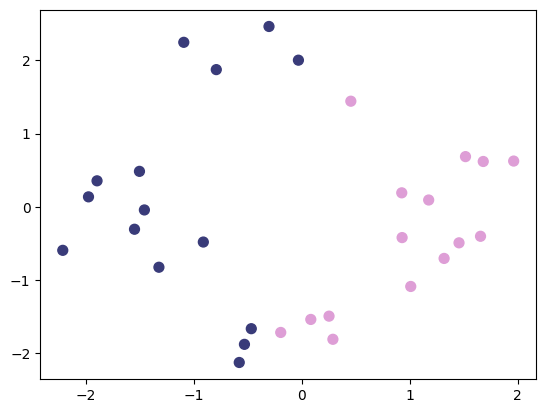

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0)
plot_2d_clf_problem(X, y)

Accuracy: 1.0


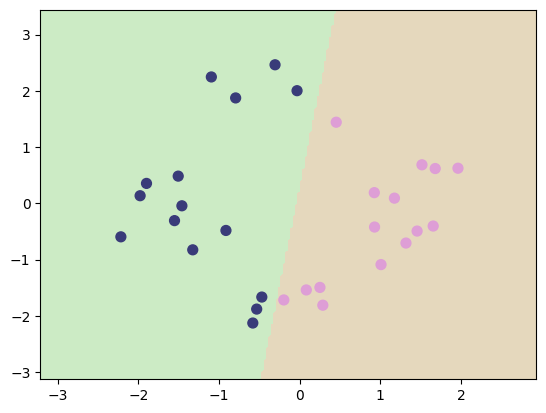

In [7]:
model = LogisticRegression(lr=3e-3, max_iter=5000)
model.fit(X, y)
print(f'Accuracy: {model.accuracy(X, y)}')
plot_2d_clf_problem(X, y, lambda x : model.predict(x) > 0.5)